### Covid-19 spread rate prediction 
- An epidemiological model

#### import all the packages

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

#### data preprocessing and Exploration

In [2]:
# Get the latest data
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [3]:
cov_cases = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
cov_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [4]:
cov_deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
cov_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,10,15,16,19,22,22,27,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [5]:
cov_recovered = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
cov_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,33,34,34,35,35,35,35,41,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,101,118,118,118,118,118,144,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,96,96,97,105,105,109,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,26,26,26,35,42,42,49,60


In [6]:
col_names = cov_cases.columns
col_names

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20'],
      dtype='object')

In [7]:
dates_cases = cov_cases.loc[:,col_names[4]:col_names[-1]]
dates_deaths = cov_deaths.loc[:,col_names[4]:col_names[-1]]
dates_recovered = cov_recovered.loc[:,col_names[4]:col_names[-1]]

In [8]:
dates = dates_cases.keys()
total_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for date in dates:
    cases_sum = dates_cases[dates].sum()
    deaths_sum = dates_deaths[dates].sum()
    recovered_sum = dates_recovered[dates].sum()
    
    total_cases.append(cases_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recovered_sum)

In [9]:
cases_sum, deaths_sum, recovered_sum

(1/22/20       555
 1/23/20       653
 1/24/20       941
 1/25/20      1434
 1/26/20      2118
 1/27/20      2927
 1/28/20      5578
 1/29/20      6166
 1/30/20      8234
 1/31/20      9927
 2/1/20      12038
 2/2/20      16787
 2/3/20      19881
 2/4/20      23892
 2/5/20      27635
 2/6/20      30817
 2/7/20      34391
 2/8/20      37120
 2/9/20      40150
 2/10/20     42762
 2/11/20     44802
 2/12/20     45221
 2/13/20     60368
 2/14/20     66885
 2/15/20     69030
 2/16/20     71224
 2/17/20     73258
 2/18/20     75136
 2/19/20     75639
 2/20/20     76197
 2/21/20     76823
 2/22/20     78579
 2/23/20     78965
 2/24/20     79568
 2/25/20     80413
 2/26/20     81395
 2/27/20     82754
 2/28/20     84120
 2/29/20     86011
 3/1/20      88369
 3/2/20      90306
 3/3/20      92840
 3/4/20      95120
 3/5/20      97882
 3/6/20     101784
 3/7/20     105821
 3/8/20     109795
 3/9/20     113561
 3/10/20    118592
 3/11/20    125865
 3/12/20    128343
 3/13/20    145193
 3/14/20    

In [12]:
days_since_22_jan = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_cases = np.array(total_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# print(days_since_22_jan.shape)
# print(total_cases.shape)

In [13]:
latest_cases = cov_cases[dates[-1]]
latest_deaths = cov_deaths[dates[-1]]
latest_recovered = cov_recovered[dates[-1]]

In [14]:
countries = list(cov_cases['Country/Region'].unique())
#countries
#len(countries)

In [15]:
country_total_cases = []
no_cases = []

for country in countries:
    cases = latest_cases[cov_cases['Country/Region']==country].sum()
    if cases > 0 :
        country_total_cases.append(cases)
    else:
        no_cases.append(country)

for country in no_cases:
    countries.remove(country)

countries = [k for k, v in sorted(zip(countries, country_total_cases), key=operator.itemgetter(1), reverse=1)]

for i in range(len(countries)):
    country_total_cases[i] = latest_cases[cov_cases['Country/Region']==countries[i]].sum()

In [16]:
print('No of cases by Country/Region')
for i in range(len(countries)):
    print(f'{countries[i]} : {country_total_cases[i]}')

No of cases by Country/Region
China : 81102
Italy : 35713
Iran : 17361
Spain : 13910
Germany : 12327
France : 9105
Korea, South : 8413
US : 7783
Switzerland : 3028
United Kingdom : 2642
Netherlands : 2058
Austria : 1646
Norway : 1550
Belgium : 1486
Sweden : 1279
Denmark : 1115
Japan : 889
Malaysia : 790
Cruise Ship : 712
Canada : 657
Australia : 568
Czechia : 464
Qatar : 452
Portugal : 448
Israel : 433
Greece : 418
Brazil : 372
Finland : 336
Singapore : 313
Pakistan : 299
Ireland : 292
Slovenia : 275
Romania : 260
Estonia : 258
Bahrain : 256
Poland : 251
Iceland : 250
Chile : 238
Indonesia : 227
Thailand : 212
Luxembourg : 203
Philippines : 202
Egypt : 196
Saudi Arabia : 171
Iraq : 164
India : 156
Russia : 147
Peru : 145
Kuwait : 142
Lebanon : 133
San Marino : 119
South Africa : 116
United Arab Emirates : 113
Ecuador : 111
Slovakia : 105
Taiwan* : 100
Turkey : 98
Mexico : 93
Colombia : 93
Bulgaria : 92
Panama : 86
Armenia : 84
Serbia : 83
Croatia : 81
Argentina : 79
Vietnam : 75
Algeri

In [17]:
provinces = list(cov_cases['Province/State'].unique())
outliers = ['United Kingdom', 'Denmark', 'France']

for i in outliers:
    provinces.remove(i)

In [18]:
province_total_cases = []
no_cases = []

for province in provinces:
    cases = latest_cases[cov_cases['Province/State']==province].sum()
    if cases > 0 :
        province_total_cases.append(cases)
    else:
        no_cases.append(province)

for province in no_cases:
    provinces.remove(province)

In [19]:
print('No of cases by Province/State')
for i in range(len(provinces)):
    print(f'{provinces[i]} : {province_total_cases[i]}')

No of cases by Province/State
British Columbia : 186
New South Wales : 267
Victoria : 121
Queensland : 94
South Australia : 37
Western Australia : 35
Tasmania : 10
Northern Territory : 1
Ontario : 221
Alberta : 97
Quebec : 94
Washington : 1014
New York : 2495
California : 751
Massachusetts : 218
Diamond Princess : 759
Grand Princess : 30
Georgia : 199
Colorado : 184
Florida : 314
New Jersey : 267
Oregon : 68
Texas : 173
Illinois : 162
Pennsylvania : 152
Iowa : 29
Maryland : 85
North Carolina : 70
South Carolina : 47
Tennessee : 79
Virginia : 77
Arizona : 27
Indiana : 39
Kentucky : 27
District of Columbia : 31
Nevada : 55
New Hampshire : 26
Minnesota : 77
Nebraska : 24
Ohio : 86
Rhode Island : 33
Wisconsin : 92
Connecticut : 68
Hawaii : 14
Oklahoma : 19
Utah : 51
Kansas : 18
Louisiana : 257
Missouri : 18
Vermont : 18
Alaska : 6
Arkansas : 33
Delaware : 19
Idaho : 9
Maine : 42
Michigan : 83
Mississippi : 34
Montana : 11
New Mexico : 23
North Dakota : 6
South Dakota : 11
West Virginia : 1

In [21]:
nan_values = []

for i in range(len(provinces)):
    if type(provinces[i]) == float:
        nan_values.append(i)
        
provinces = list(provinces)
province_totaL_cases = list(province_total_cases)

for i in nan_values:
    provinces.pop(i)
    province_total_cases.pop(i)
    

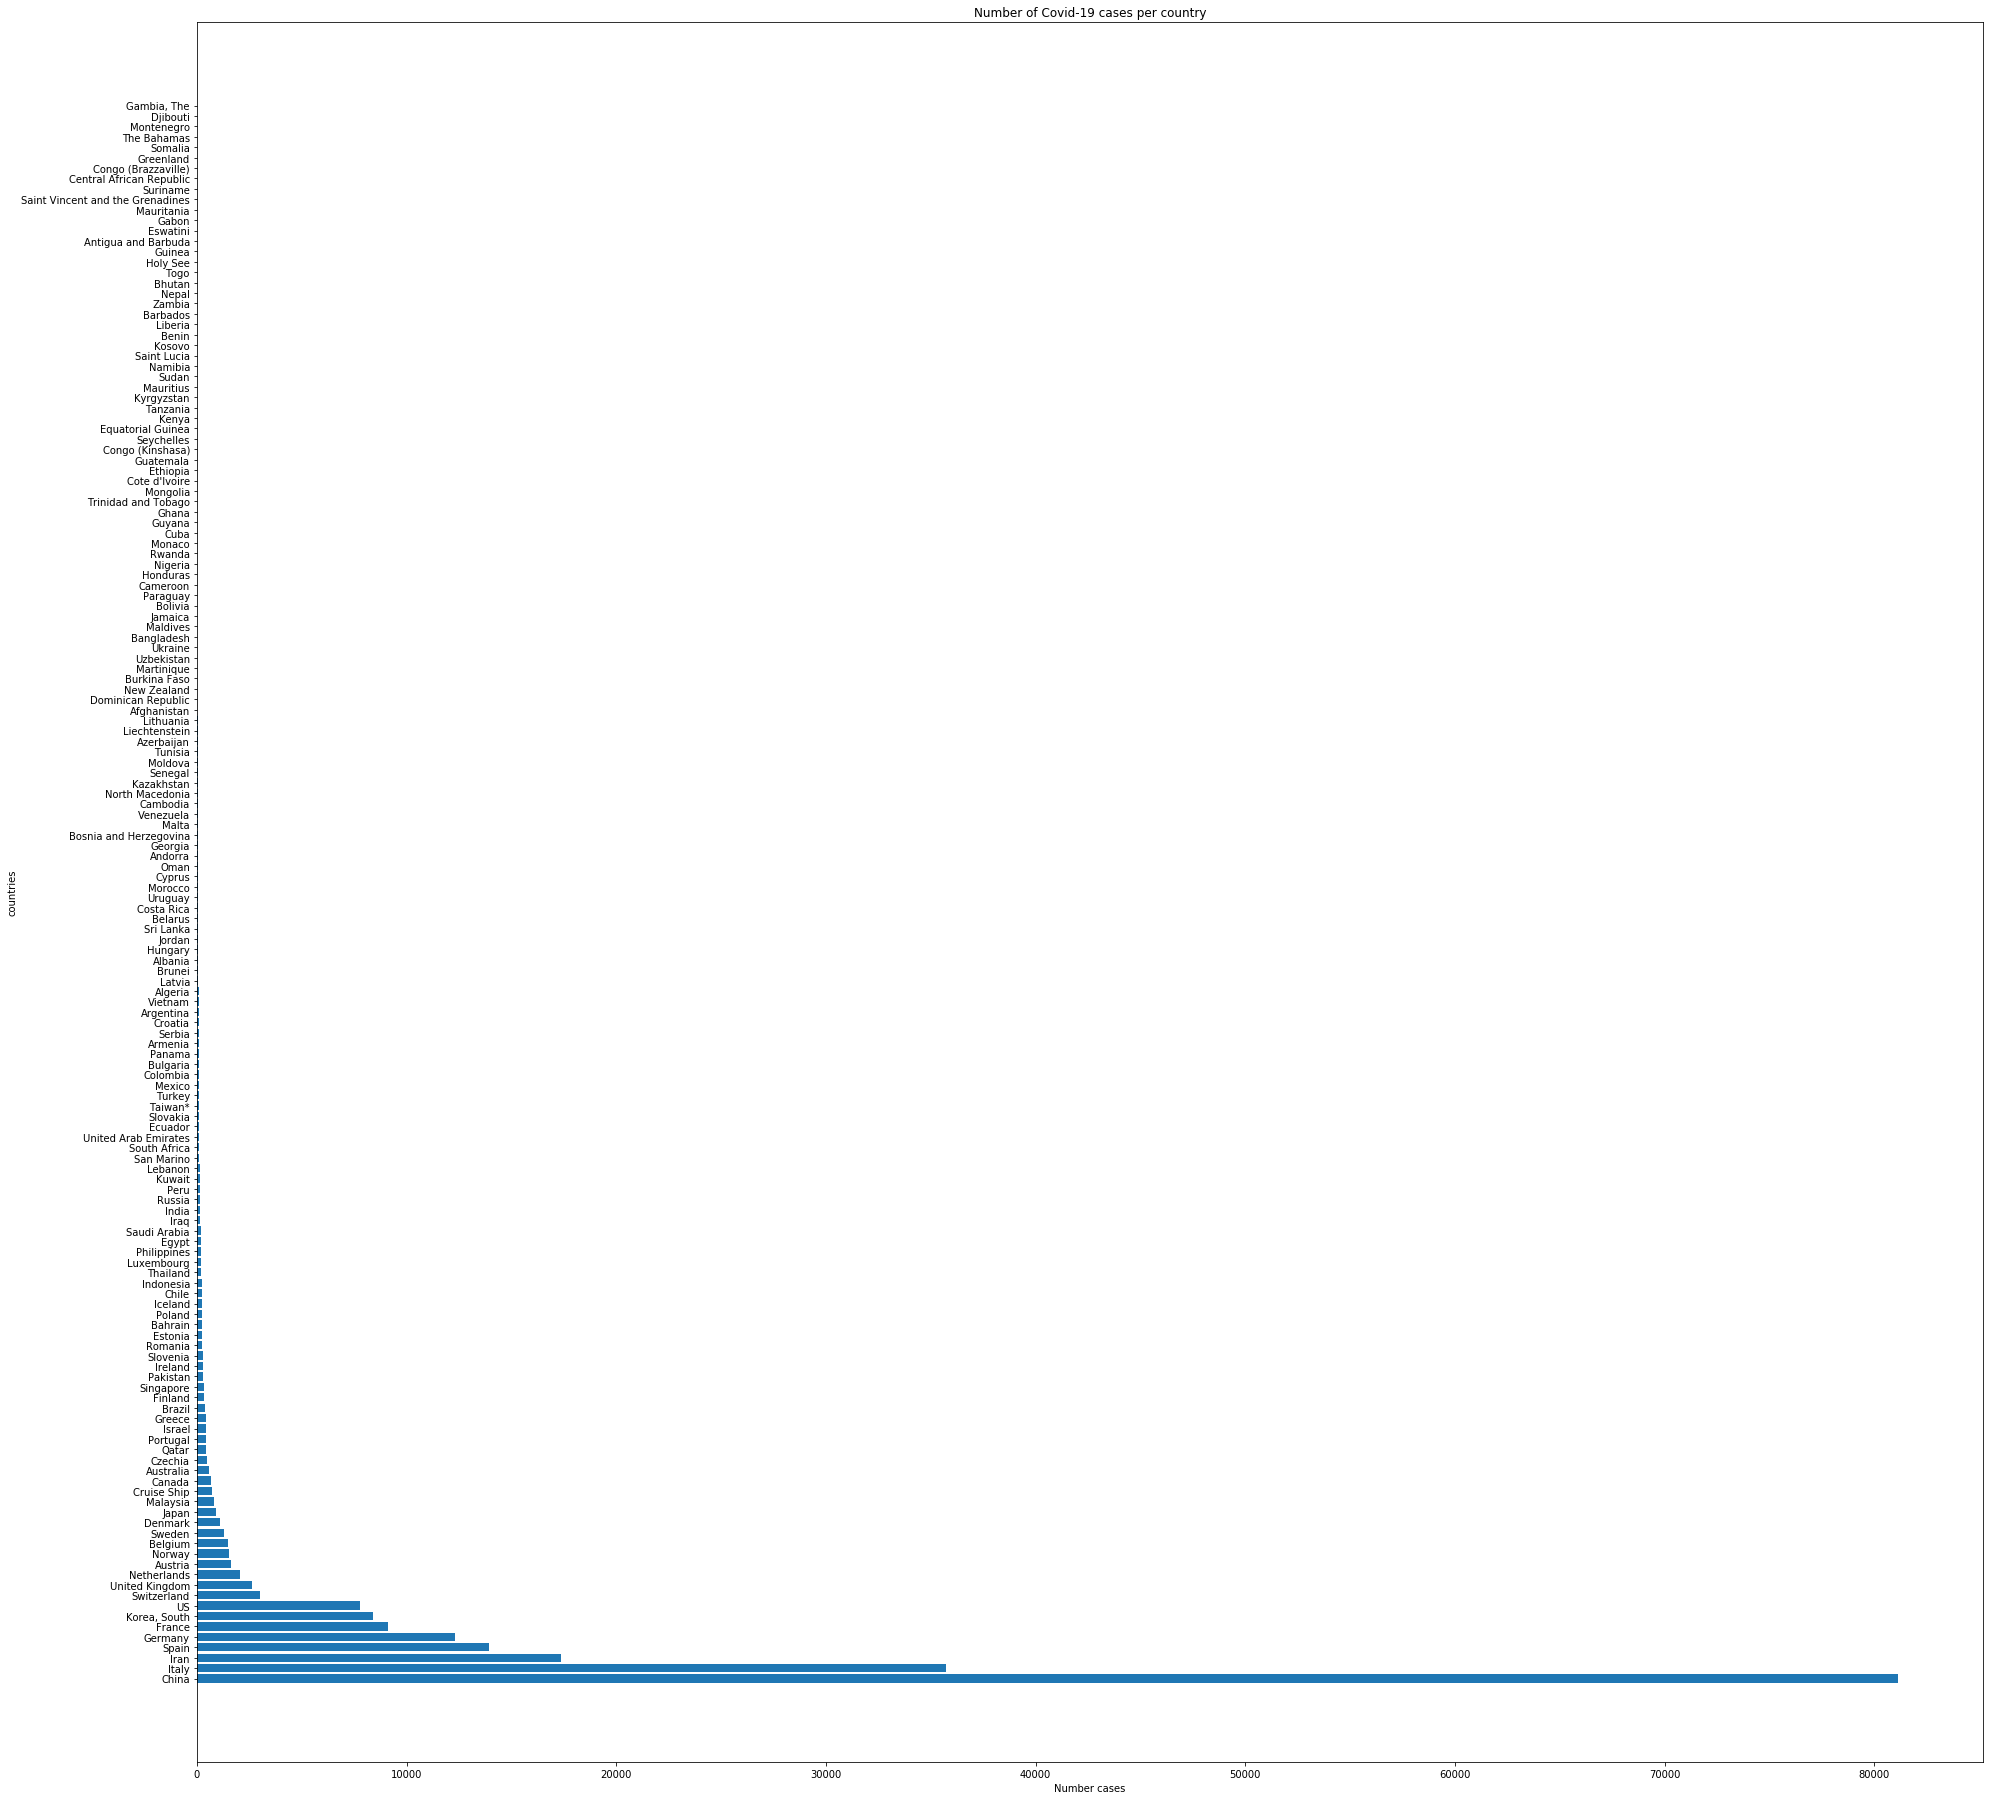

In [22]:
plt.figure(figsize=(32, 32))
plt.barh(countries, country_total_cases)
plt.title('Number of Covid-19 cases per country')
plt.xlabel('Number cases')
plt.ylabel('countries')
plt.show()

In [23]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_22_jan, total_cases, test_size=0.15, shuffle=False)

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

ValueError: Found input variables with inconsistent numbers of samples: [57, 3249]